In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d iabhishekbhardwaj/breast-cancer-prediction

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 18.7MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!unzip /content/breast-cancer-prediction.zip

Archive:  /content/breast-cancer-prediction.zip
  inflating: data.csv                


In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


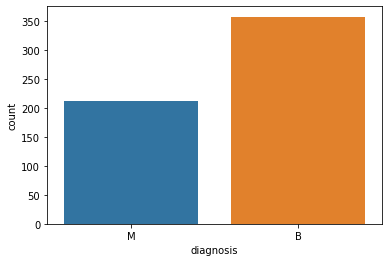

In [ ]:
sns.countplot(df['diagnosis'])

In [ ]:
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=True)

In [ ]:
df.drop(columns=['id'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
diagnosis_M                  0
dtype: i

In [ ]:
df.drop(columns=['Unnamed: 32'], axis=1, inplace=True)

In [ ]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df = df.sample(frac=1)

In [ ]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,0.2202,0.06113,0.4953,1.1990,2.765,63.33,0.005033,0.031790,0.04755,0.01043,0.01578,0.003224,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465,1
328,16.27,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.06277,0.4375,1.2320,3.270,44.41,0.006697,0.020830,0.03248,0.01392,0.01536,0.002789,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200,1
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.3420,1.170,14.16,0.004352,0.004899,0.01343,0.01164,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,0.3129,0.8413,2.075,29.44,0.009882,0.024440,0.04531,0.01763,0.02471,0.002142,16.43,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828,1
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,0.3677,1.4710,1.597,22.68,0.010490,0.042650,0.04004,0.01544,0.02719,0.007596,11.28,20.61,71.53,390.4,0.14020,0.23600,0.18980,0.09744,0.2608,0.09702,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['diagnosis_M'], axis=1)

y = df['diagnosis_M']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = Scaler.transform(X_train)

X_test = Scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

(381, 30)

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.10))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
validation_data = (X_test, y_test)

In [ ]:
result = model.fit(X_train, y_train, validation_data = validation_data, epochs=350, verbose=1, callbacks=[early_stop])

Epoch 1/350
12/12 [==============================] - 1s 19ms/step - loss: 0.6598 - accuracy: 0.6325 - val_loss: 0.6644 - val_accuracy: 0.6011
Epoch 2/350
12/12 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6457 - val_loss: 0.6578 - val_accuracy: 0.6011
Epoch 3/350
12/12 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.6404 - val_loss: 0.6515 - val_accuracy: 0.6011
Epoch 4/350
12/12 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.6404 - val_loss: 0.6458 - val_accuracy: 0.6011
Epoch 5/350
12/12 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.6404 - val_loss: 0.6396 - val_accuracy: 0.6011
Epoch 6/350
12/12 [==============================] - 0s 5ms/step - loss: 0.6246 - accuracy: 0.6404 - val_loss: 0.6335 - val_accuracy: 0.6011
Epoch 7/350
12/12 [==============================] - 0s 6ms/step - loss: 0.6228 - accuracy: 0.6404 - val_loss: 0.6276 - val_accuracy: 0.6011
Epoch 8/350


In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.659795,0.632546,0.664361,0.601064
1,0.651210,0.645669,0.657833,0.601064
2,0.642743,0.640420,0.651536,0.601064
3,0.636825,0.640420,0.645791,0.601064
4,0.632223,0.640420,0.639624,0.601064
...,...,...,...,...
345,0.090480,0.973753,0.110463,0.973404
346,0.091122,0.981627,0.110393,0.973404
347,0.088624,0.976378,0.110549,0.973404
348,0.091695,0.973753,0.110640,0.973404


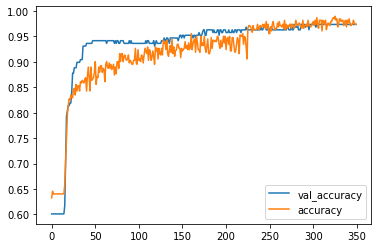

In [ ]:
losses[['val_accuracy', 'accuracy']].plot()

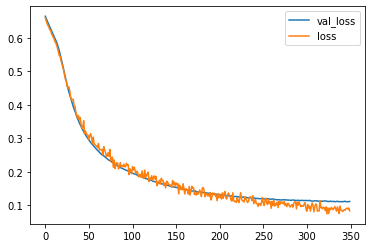

In [ ]:
losses[['val_loss', 'loss']].plot()

In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions = np.argmax(preds, axis=1)

In [ ]:
predictions.shape

(188,)

In [ ]:
y_test.shape

(188,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       113
           1       0.00      0.00      0.00        75

    accuracy                           0.60       188
   macro avg       0.30      0.50      0.38       188
weighted avg       0.36      0.60      0.45       188



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import auc, roc_curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def metrics(target, pred):
  fpr,tpr,threshold = roc_curve(target,pred)
  return auc(fpr,tpr)

In [ ]:
Rf = RandomForestClassifier()
model_Rf = Rf.fit(X_train, y_train)
preds = model_Rf.predict(X_test)

In [ ]:
print(metrics(y_test, preds))

0.9444837758112095


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       113
           1       0.97      0.91      0.94        75

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



In [ ]:
import pickle

Rf = RandomForestClassifier()
model_Rf = Rf.fit(X_train, y_train)

filename = 'Breast_Cancer_Detector_using_Clinical_records.sav'
pickle.dump(model_Rf, open(filename, 'wb'))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []
for i in range(1,100):
  KNN = KNeighborsClassifier(n_neighbors=i)
  Model = KNN.fit(X_train, y_train)
  preds = Model.predict(X_test)
  error_rate.append(np.mean(preds!=y_test))

Text(0, 0.5, 'Error Rate')

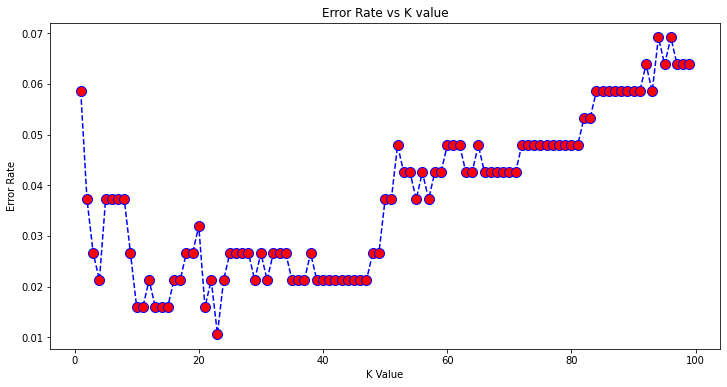

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [ ]:
error_rate = []
for i in range(20,30):
  KNN = KNeighborsClassifier(n_neighbors=i)
  Model = KNN.fit(X_train, y_train)
  preds = Model.predict(X_test)
  error_rate.append(np.mean(preds!=y_test))

Text(0, 0.5, 'Error Rate')

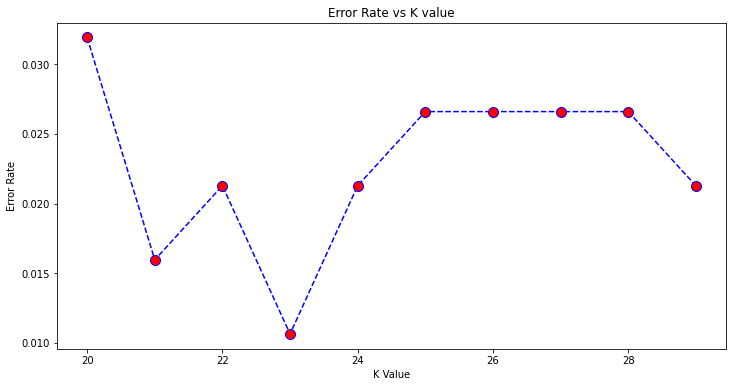

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(20,30),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=23)
Model = KNN.fit(X_train, y_train)
preds = Model.predict(X_test)

In [ ]:
preds

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=uint8)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       113
           1       1.00      0.97      0.99        75

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [ ]:
import pickle

kNN = KNeighborsClassifier(n_neighbors=46)
kNN.fit(X_train,y_train)

# Its important to use binary mode
knnPickle = open('Breast_cancer_using_clinical_records', 'wb')

# source, destination
pickle.dump(KNN, knnPickle)